In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
%load_ext blackcellmagic

In [7]:
df_loans_backup = pd.read_csv('/home/adarsh/dattada/jupyter/loan-data/loan.csv')

/home/adarsh/anaconda3/envs/pycaret_test/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
df_loans = df_loans_backup.copy(deep = True)

In [57]:
import preprocess as pre

In [58]:
import EDA as eda

In [59]:
import feature_engineering as fe

In [147]:
df_loans = df_loans[df_loans['application_type'] == 'Individual']

In [148]:
date_columns = ['issue_d','earliest_cr_line']

In [149]:
df_loans = pre.object_to_date(df_loans,columns = date_columns)

In [150]:
df_loans = pre.vintage_selection_for_modeling(df_loans)

In [151]:
cat_columns = [
    "grade",
    "home_ownership",
    "addr_state",
    "sub_grade",
    "verification_status",
    "purpose",
    "initial_list_status",
    "term"
]

In [152]:
numeric_columns = [
    "installment",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "total_acc",
    "acc_now_delinq",
    "annual_inc",
    "mths_since_last_delinq",
    "dti",
    "mths_since_last_record",
    "int_rate",
    "emp_length",
    "mths_since_earliest_cr_line"
]

In [153]:
df_loans['good_bad'] = pre.good_bad_definition(df_loans['loan_status'])

In [154]:
df_loans['mths_since_earliest_cr_line'] = round((df_loans['issue_d_date'] - df_loans['earliest_cr_line_date'])/np.timedelta64(1,'M'))

In [155]:
df_loans = df_loans[date_columns + cat_columns + numeric_columns + ['good_bad','issue_d_date','funded_amnt','recoveries','total_rec_prncp','loan_status']]

In [69]:
df_loans = pre.emp_length_to_numeric(df_loans)

In [70]:
df_loans = fe.get_dummies(df_loans,'addr_state')

In [71]:
df_loans = fe.get_dummies(df_loans,'home_ownership')

In [72]:
df_loans = fe.get_dummies(df_loans,'sub_grade')

In [73]:
df_loans = fe.get_dummies(df_loans,'purpose',sep = ':')

In [74]:
df_loans = fe.get_dummies(df_loans,'grade')

In [75]:
df_loans = fe.get_dummies(df_loans,'verification_status',sep = ':')

In [76]:
df_loans = fe.get_dummies(df_loans,'initial_list_status')

In [77]:
df_loans = fe.get_dummies(df_loans,'term',sep = ':')

In [78]:
df_loans = fe.coarse_class_discrete_variables(df_loans)

In [79]:

df_loans['total_acc'].fillna(0, inplace=True)
df_loans['pub_rec'].fillna(0, inplace=True)
df_loans['open_acc'].fillna(0, inplace=True)
df_loans['inq_last_6mths'].fillna(0, inplace=True)
df_loans['delinq_2yrs'].fillna(0, inplace=True)
df_loans['emp_length'].fillna(0, inplace=True)

In [80]:
df_loans['annual_inc'].fillna(df_loans['annual_inc'].mean(), inplace=True)

In [81]:
df_loans['mths_since_earliest_cr_line'].fillna(0, inplace=True)

In [82]:
df_loans = fe.coarse_class_continuous_variables(df_loans)

In [83]:
df_loans.shape

(1501690, 156)

In [85]:
df_loans.drop(drop_more_columns,axis = 1, inplace = True)

In [86]:
list(df_loans.columns)

['good_bad',
 'issue_d_date',
 'addr_state_DC',
 'addr_state_LA',
 'addr_state_ME',
 'addr_state_MO',
 'addr_state_MT',
 'addr_state_NH',
 'addr_state_OH',
 'addr_state_OR',
 'addr_state_SD',
 'addr_state_TX',
 'addr_state_VT',
 'home_ownership_MORTGAGE',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'purpose:credit_card',
 'purpose:debt_consolidation',
 'purpose:medical',
 'purpose:other',
 'purpose:small_business',
 'purpose:vacation',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'verification_status:Not 

In [87]:
ref_categories = ['grade_G',
'home_ownership:OTHER_RENT',
'addr_state:IA_MS',
'verification_status:Verified',
'purpose:ed_re_mo_ho',
'initial_list_status_f',
'term: 60 months',
'emp_length:0',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [88]:
df_loans.drop(ref_categories,axis = 1,inplace = True)

In [89]:
is_OOT_36_months = (df_loans['issue_d_date'].dt.year == 2017) & (df_loans['term: 36 months'] == 1)
is_OOT_60_months = (df_loans['issue_d_date'].dt.year == 2015) & (df_loans['term: 36 months'] == 0)

In [90]:
df_OOT_loans = df_loans[is_OOT_36_months|is_OOT_60_months]

In [91]:
df_loans = df_loans[~(is_OOT_36_months|is_OOT_60_months)]

In [92]:
drop_more_columns = ['issue_d','earliest_cr_line','installment','acc_now_delinq','issue_d_date']

In [93]:
df_loans.drop(drop_more_columns,axis = 1, inplace = True)

In [106]:
df_OOT_loans.drop(drop_more_columns,axis = 1, inplace = True)

In [94]:
list(df_loans.columns)

['good_bad',
 'addr_state_DC',
 'addr_state_LA',
 'addr_state_ME',
 'addr_state_MO',
 'addr_state_MT',
 'addr_state_NH',
 'addr_state_OH',
 'addr_state_OR',
 'addr_state_SD',
 'addr_state_TX',
 'addr_state_VT',
 'home_ownership_MORTGAGE',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'purpose:credit_card',
 'purpose:debt_consolidation',
 'purpose:medical',
 'purpose:other',
 'purpose:small_business',
 'purpose:vacation',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'verification_status:Not Verified',
 'verification_sta

In [53]:
from sklearn.linear_model import LogisticRegression

In [98]:
logreg = LogisticRegression(solver = 'sag',random_state = 9)

In [95]:
X_train = df_loans.drop('good_bad',axis = 1)

In [96]:
y_train = df_loans['good_bad']

In [99]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
X_test = df_OOT_loans.drop('good_bad',axis = 1)

In [108]:
y_test = df_OOT_loans['good_bad']

In [110]:
logreg.score(X_test,y_test)

0.8580000644962155

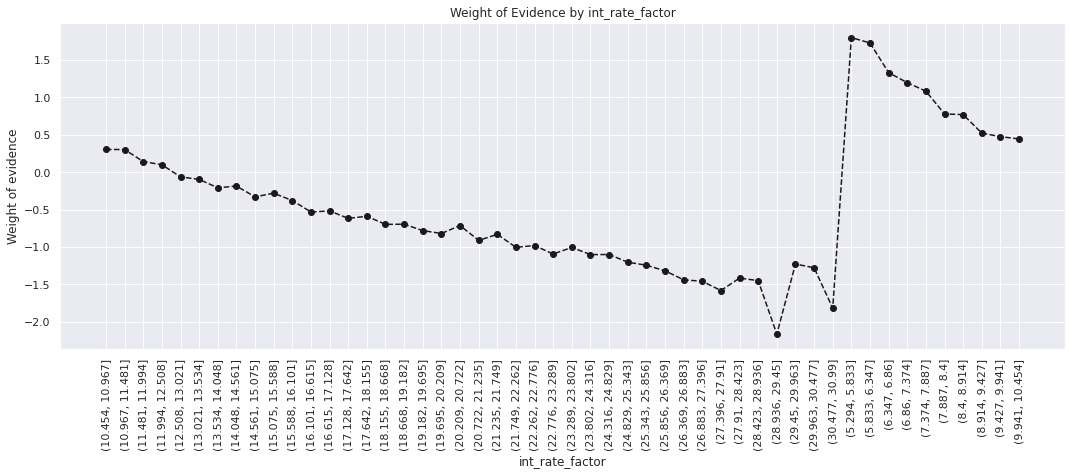

In [286]:
eda.woe_discrete_plot(df_woe,rotation_of_x_axis_labels=90)

## LGD

In [120]:
df_loans['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [121]:
loan_status_chargeoff = df_loans['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])

In [124]:
df_LGD_EAD = df_loans.loc[loan_status_chargeoff,['funded_amnt','recoveries','total_rec_prncp']]

In [137]:
df_LGD_EAD['EAD'] = (df_loans['funded_amnt'] - df_loans['total_rec_prncp'])/df_loans['funded_amnt']

In [128]:
df_LGD_EAD['LGD'] = (df_LGD_EAD['EAD'] - df_LGD_EAD['recoveries'])/df_LGD_EAD['EAD']

In [132]:
df_LGD_EAD[df_LGD_EAD['EAD'] < df_LGD_EAD['recoveries']].sample(10)


,funded_amnt,recoveries,total_rec_prncp,EAD,LGD
2104470,12500,7051.87,5621.13,6878.87,-2.514948e-02
2129080,3200,3345.54,32.51,3167.49,-5.621170e-02
1848107,15000,6185.05,9059.22,5940.78,-4.111750e-02
1948593,30000,29923.86,2823.25,27176.75,-1.010831e-01
1142899,30000,10397.26,19602.74,10397.26,-1.749489e-16
2156910,16000,16205.26,1005.88,14994.12,-8.077433e-02
2132894,15250,10263.12,5035.39,10214.61,-4.749080e-03
1789645,28000,1047.98,26974.12,1025.88,-2.154248e-02
1337915,14400,13926.16,1339.57,13060.43,-6.628649e-02
1375471,33050,29473.07,4546.77,28503.23,-3.402562e-02


In [136]:
df_LGD_EAD['LGD'].clip(0,1).describe()

count    256673.000000
mean          0.892836
std           0.132254
min           0.000000
25%           0.857780
50%           0.897892
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [138]:
df_LGD_EAD['EAD'].describe()

count    256687.000000
mean          0.695054
std           0.218447
min           0.000000
25%           0.563918
50%           0.743975
75%           0.869097
max           1.000000
Name: EAD, dtype: float64

In [134]:
df_LGD_EAD[df_LGD_EAD['EAD'] == 0]

,funded_amnt,recoveries,total_rec_prncp,EAD,LGD
564875,6925,0.00,6925.0,0.0,NaN
675644,21000,0.00,21000.0,0.0,NaN
692510,32000,38.73,32000.0,0.0,-inf
697041,2550,9.11,2550.0,0.0,-inf
759854,14500,37.67,14500.0,0.0,-inf
801479,2400,0.00,2400.0,0.0,NaN
807340,7800,0.00,7800.0,0.0,NaN
811735,25000,0.00,25000.0,0.0,NaN
846251,9000,0.00,9000.0,0.0,NaN
892900,20000,19.21,20000.0,0.0,-inf


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [142]:
(df_LGD_EAD['LGD'].clip(0,1) == 1).sum()

81692

In [143]:
df_LGD_EAD.shape

(256687, 5)

(array([  161.,   642.,   198.,   984.,   818.,   674.,  1327.,   859.,
         1259.,  1528.,  1260.,  1751.,  1873.,  1800.,  2031.,  2302.,
         2337.,  2702.,  2879.,  2920.,  3270.,  3436.,  3703.,  3982.,
         4200.,  4406.,  4556.,  5265.,  5678.,  5636.,  6110.,  6592.,
         7082.,  7157.,  7730.,  8609.,  8783.,  9157.,  9389.,  9833.,
        10422., 10908., 10859., 11238., 11451., 12346., 11255., 10274.,
         8128.,  4927.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

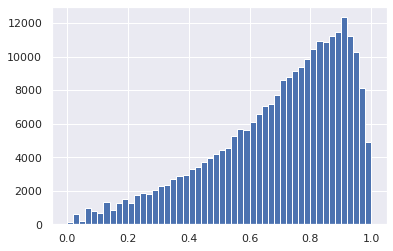

In [144]:
plt.hist(df_LGD_EAD['EAD'],bins = 50)